<a href="https://colab.research.google.com/github/SunilAshish/trial_pytorch_repository/blob/main/simple_Neural_Network_Iris_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [32]:
#Create a Model that inherits nn.Module
class Model(nn.Module):
  #Input layer(4 features of flower, Hidden Layer 1 (number of neurons)-->h2(3)-->Output (Thrree flower type))
  def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #Instantiate our nn.Module
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [33]:
#Peak a mannual seed for randomization
torch.manual_seed(41)
#Create an instance model
model=Model()


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [35]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [36]:
#changing last column variet elements with number
my_df['variety']=my_df.variety.map({'Setosa':0,'Versicolor':1,'Virginica':2})
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
#Train Test Split
X=my_df.drop('variety',axis=1)
y=my_df['variety']

In [38]:
X=X.values
y=y.values

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)


In [40]:
X_train.dtype

dtype('float64')

In [41]:
#Converting numpy to tensor
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [42]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [43]:
#Set the criteria of the model ro measure the error, how far off the prediction are from the data
criterion=nn.CrossEntropyLoss()
#Choose an optimizer, learning rate (if error dosn't go down after a bunch of iteration(Epoch) reduce learning rate)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [44]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [45]:
#Train our model
#Epoch? One run tru all the training data in our network

epoch=1000
Losses=[]
for i in range(epoch):
  #Go forward and get a prediction
  y_pred=model.forward(X_train)

  ##Neasure loses/error
  loss=criterion(y_pred,y_train)

  #Keep track of our losses
  Losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i%10==0:
    print(f'Epoch:{i} and loss:{loss}')
    #Do some back propagation: take the error rate of the forward propagation and feed it back thru the network of fine tune the weight)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0 and loss:1.125203251838684
Epoch:10 and loss:1.1095693111419678
Epoch:20 and loss:1.0961166620254517
Epoch:30 and loss:1.0845798254013062
Epoch:40 and loss:1.0739582777023315
Epoch:50 and loss:1.0637890100479126
Epoch:60 and loss:1.0539253950119019
Epoch:70 and loss:1.0440940856933594
Epoch:80 and loss:1.0337880849838257
Epoch:90 and loss:1.022811770439148
Epoch:100 and loss:1.0097211599349976
Epoch:110 and loss:0.9954857230186462
Epoch:120 and loss:0.9829918742179871
Epoch:130 and loss:0.9666639566421509
Epoch:140 and loss:0.9487200975418091
Epoch:150 and loss:0.9308029413223267
Epoch:160 and loss:0.9115161895751953
Epoch:170 and loss:0.8895677924156189
Epoch:180 and loss:0.8657041788101196
Epoch:190 and loss:0.8412498831748962
Epoch:200 and loss:0.8162347674369812
Epoch:210 and loss:0.7903991937637329
Epoch:220 and loss:0.7637472748756409
Epoch:230 and loss:0.7379684448242188
Epoch:240 and loss:0.7135275602340698
Epoch:250 and loss:0.6905203461647034
Epoch:260 and loss:0.6693

Text(0.5, 0, 'epochs')

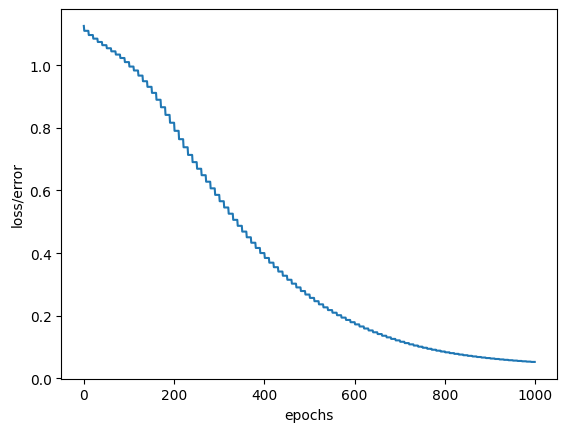

In [46]:
plt.plot(range(epoch),Losses)
plt.ylabel('loss/error')
plt.xlabel('epochs')

In [47]:
#Evaluate model on the test dataset (Valdiation )
with torch.no_grad(): #Turn off the back propagation
  y_eval=model.forward(X_test)#X test are features from our test set,y_eval will be predictions
  loss=criterion(y_eval,y_test)
print(f'Loss:{loss}')

Loss:0.13146096467971802


In [48]:
correct=0;
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    if y_test[i]==0:
      x="Setosa"
    elif y_test[i]==1:
      x="Versicolor"
    else:
      x="Virginica"

    #Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print(f'Accuracy:{(correct/len(X_test))*100}%')

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 Virginica 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 Virginica 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 Virginica 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 Versicolor 	 1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 Virginica 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 Versicolor 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 Virginica 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 Versicolor 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 Virginica 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 Virginica 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 Virginica 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 Setosa 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 Setosa 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 Versicolor 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 Setosa 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 Virginica 	 1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 Setosa 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 Versi

In [49]:
X_test

tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [50]:
new_iris=torch.tensor([1,2,3,0.4])

In [51]:
with torch.no_grad():
  x=model.forward(new_iris).argmax().item()
  print(x)
if x==0:
  x="Setosa"
elif x==1:
  x="Versicolor"
else:
  x="Virginica"
print(f'The type of flower is {x}')

1
The type of flower is Versicolor


In [52]:
#Save model
torch.save(model.state_dict(),'Iris_Model_Ashish.pt')

In [53]:
#Load the save model
new_model=Model()
new_model.load_state_dict(torch.load('Iris_Model_Ashish.pt'))

<All keys matched successfully>

In [54]:
#Making sure it loaded currectly
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)